In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
apple = pd.read_csv("applemobility-USonly.csv")

In [2]:
mitig = pd.read_csv("mitigation_cleaned.csv")

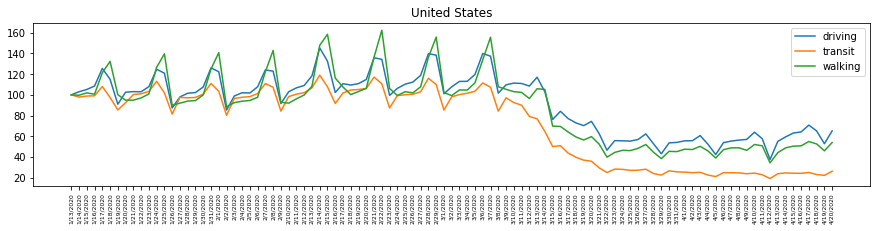

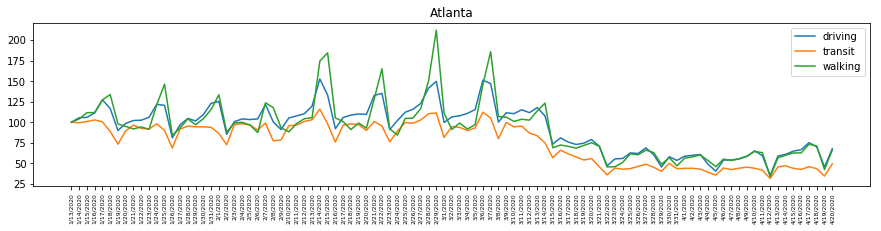

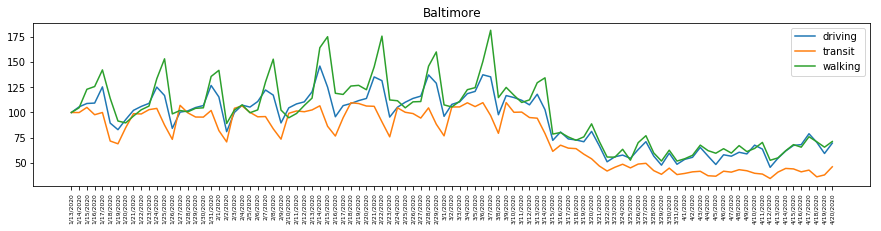

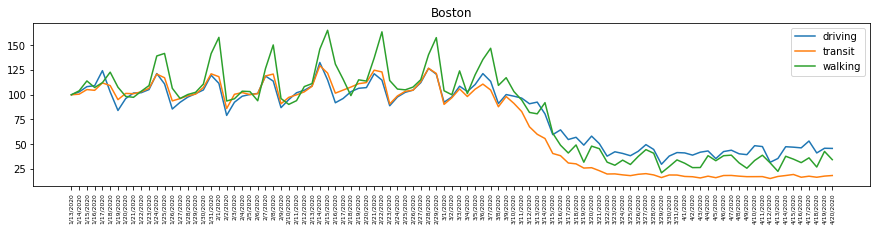

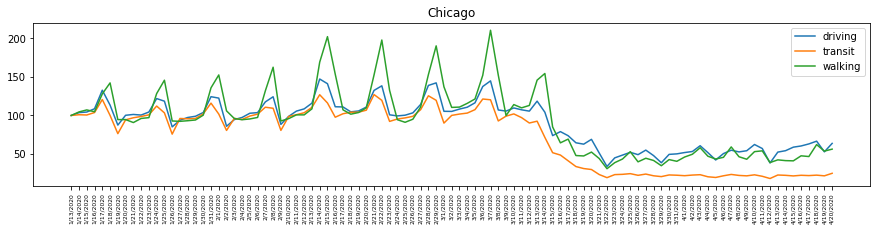

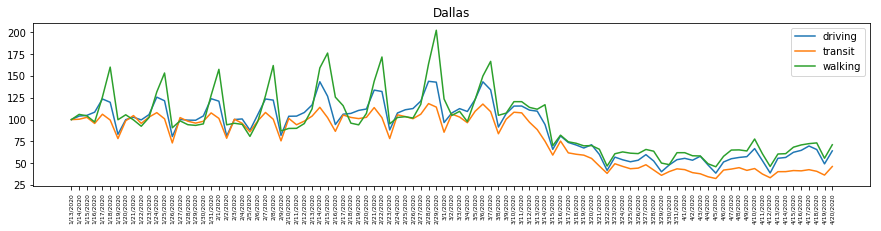

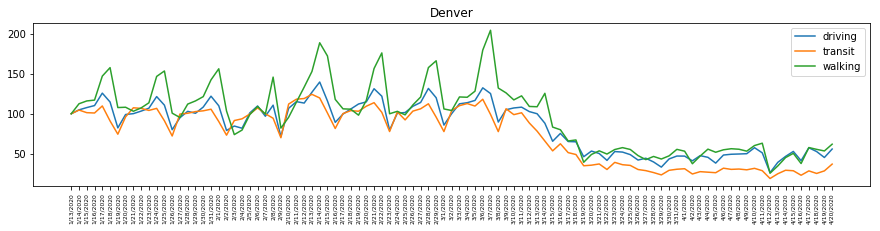

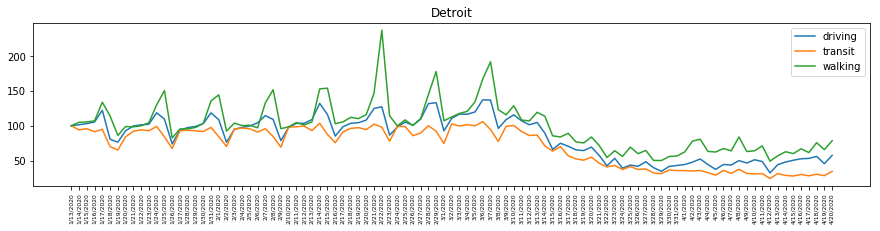

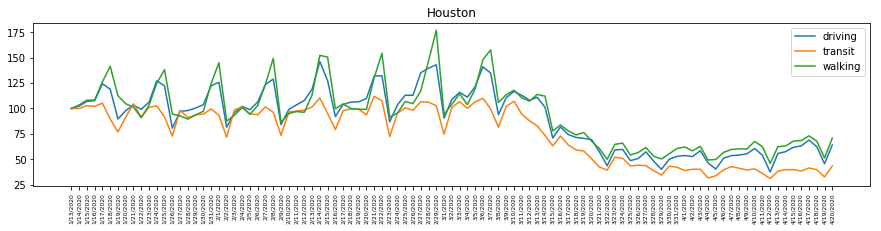

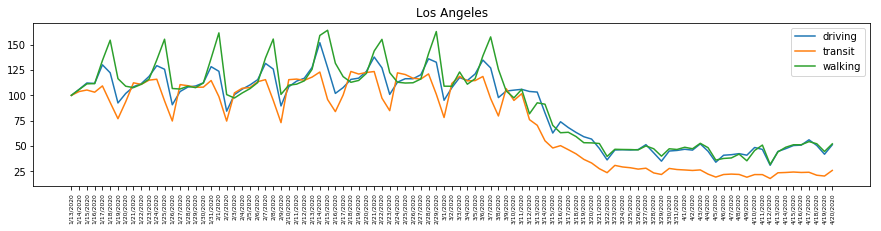

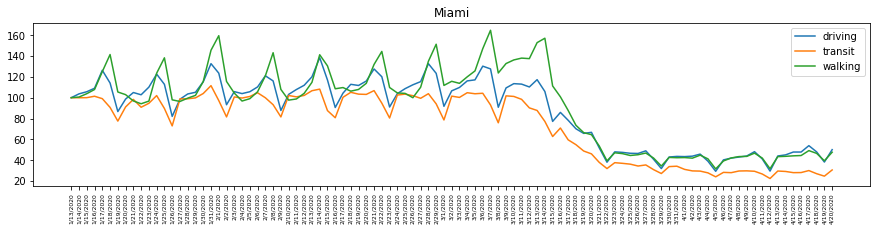

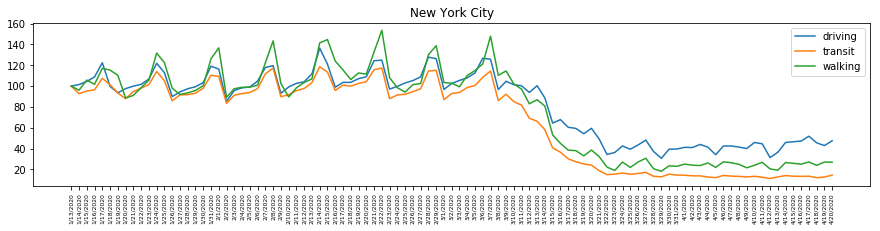

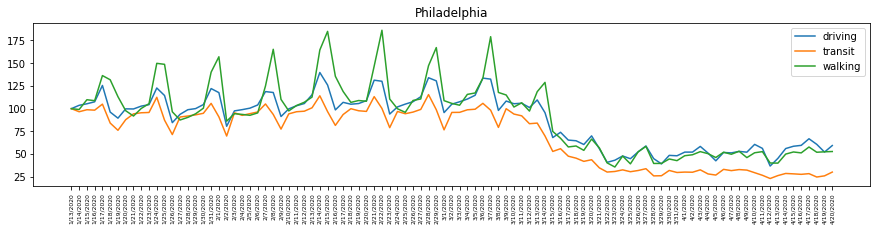

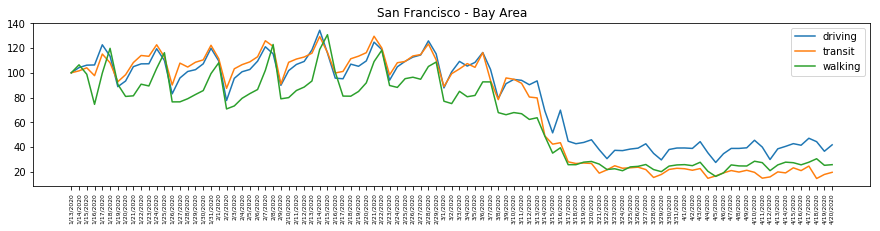

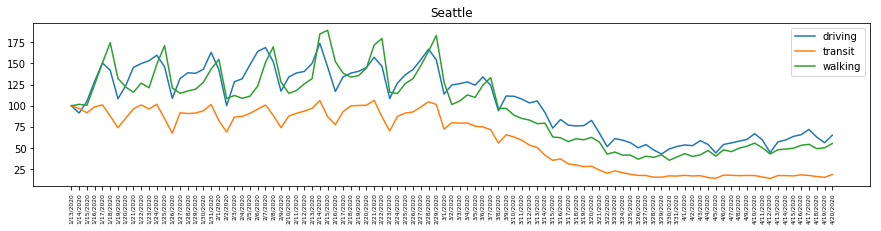

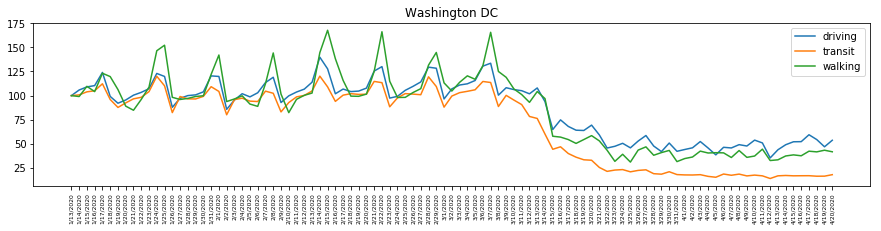

In [6]:
# Apple Mobility Data Only
for i in range(0,len(apple),3):
    current = apple.iloc[i:i+3,:]
    plt.figure(figsize=(15,3))
    plt.plot(current.iloc[0,4:].index,current.iloc[0,4:], label=current.iloc[0]["transportation_type"])
    plt.plot(current.iloc[1,4:].index,current.iloc[1,4:], label=current.iloc[1]["transportation_type"])
    plt.plot(current.iloc[2,4:].index,current.iloc[2,4:], label=current.iloc[2]["transportation_type"])
    plt.xticks(rotation=90, fontsize=6)
    plt.legend()
    plt.title(current.iloc[0]["region"])
    plt.show()

In [3]:
mitig.head()

,Unnamed: 0,State,County,Date,Raw Description,Information type,Mitigation type,Note,UserID,Source
0,0,USA,NaN,1/17/2020,Public Health Screening to Begin at 3 U.S. Air...,government,movement restriction,NaN,am50,https://www.cdc.gov/media/releases/2020/p0117-...
1,1,USA,NaN,1/31/2020,"January 31, 2020—HHS Secretary Azar Declares P...",government,other,NaN,"az17, BR30",https://www.nga.org/coronavirus/
2,2,USA,NaN,1/31/2020,The White House announced that it would ban en...,government,movement restriction,restriction on entry to USA,BR30,https://www.nbcnews.com/health/health-news/cor...
3,3,USA,NaN,2/2/2020,"February 2, 2020—Department of Homeland Securi...",government,movement restriction,NaN,"az17, BR30",https://www.nga.org/coronavirus/
4,4,USA,NaN,2/2/2020,"February 2, 2020—State Department issued a tra...",government,movement restriction,NaN,"az17, BR30",https://www.nga.org/coronavirus/


In [3]:
"""
Args-
mobility = array-like object of time series with date indices
mob_labels = array-like object of labels for the legend of the different time series
mitig_dates = array-like object of datetimes when mitigation events occurred
mitig_types = array-like object of strings 
state = string name of state
region = string name of city
"""
def plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, 
                   region=None, text_height=0, height_mod=30, figsize=(15,5), rotation=90, fontsize=8):
    if len(mobility) != len(mob_labels):
        raise ValueError("mobility and mob_labels must be the same length")
    if len(mitig_dates) != len(mitig_types):
        raise ValueError("mitig_dates and mitig_types must be the same length")
    y = []
    prev = None
    count = 0
    i = 0
    for date in mitig_dates:
        if date == prev:
            count += 1
        else:
            count = 0
        y.append(text_height + (count * height_mod))
        prev = date
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    for i in range(len(mobility)):
        ax.plot(mobility[i].index, mobility[i].values, label=mob_labels[i])
    for i in range(len(y)):
        ax.text(mitig_dates[i], y[i], mitig_types[i],rotation=rotation, fontsize=fontsize)
    plt.yticks([x for x in range(-60,201,20)])
    plt.xticks(rotation=90, fontsize=6)
    plt.legend()
    if region:
        plt.title(region)
    else:
        plt.title(state)
    plt.show()


In [8]:
apple_dates = {date: i + 3 for (i, date) in enumerate(apple.columns[4:])}

C:\Users\Chris\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


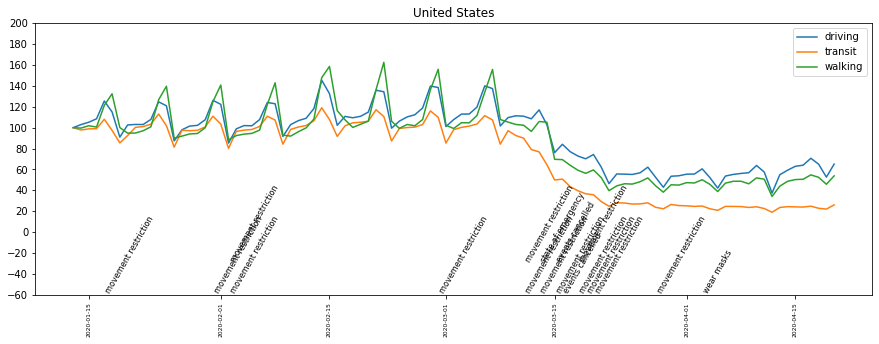

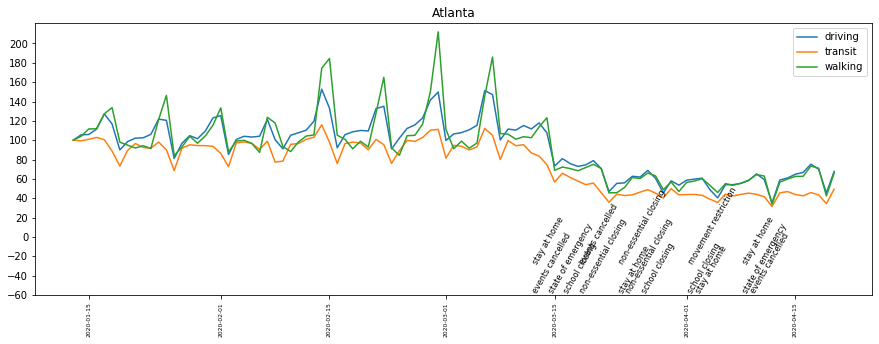

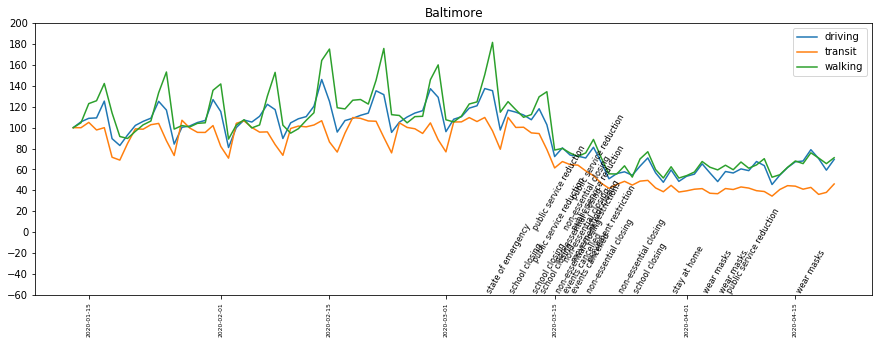

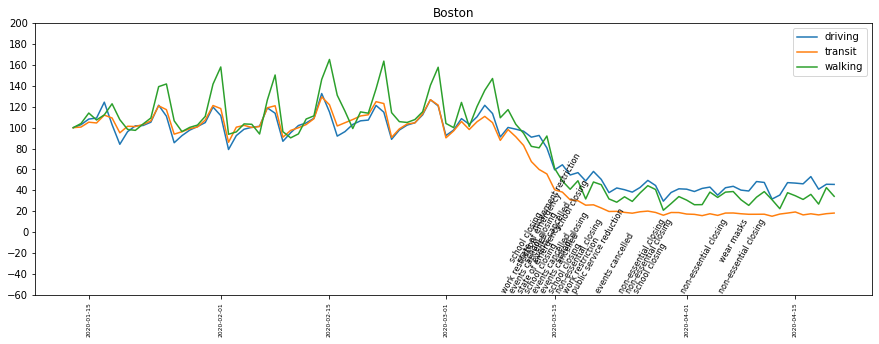

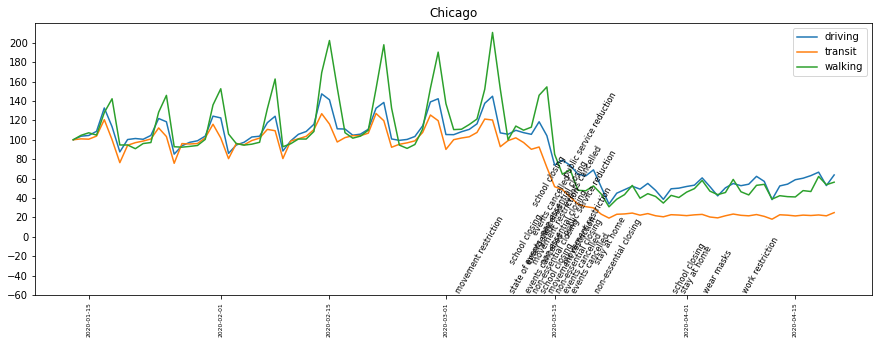

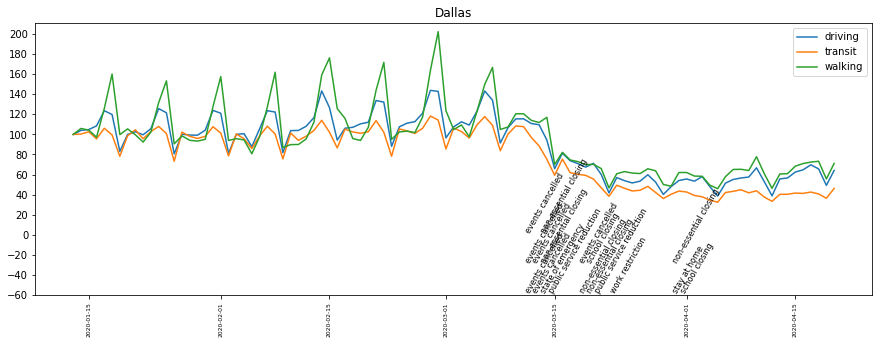

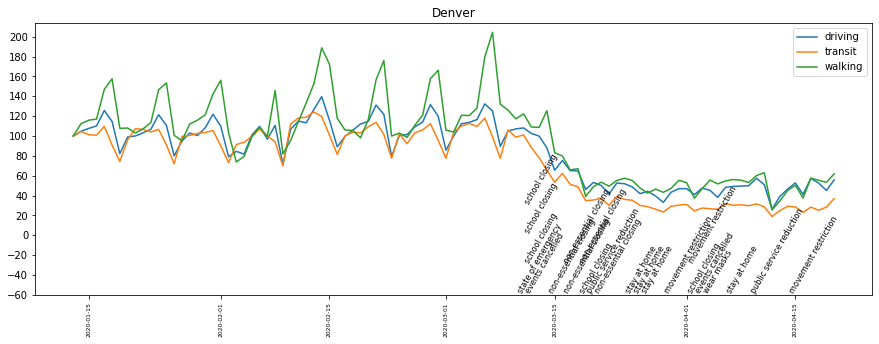

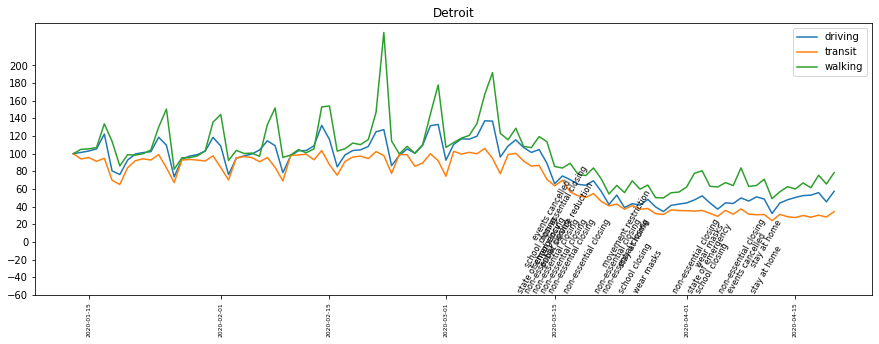

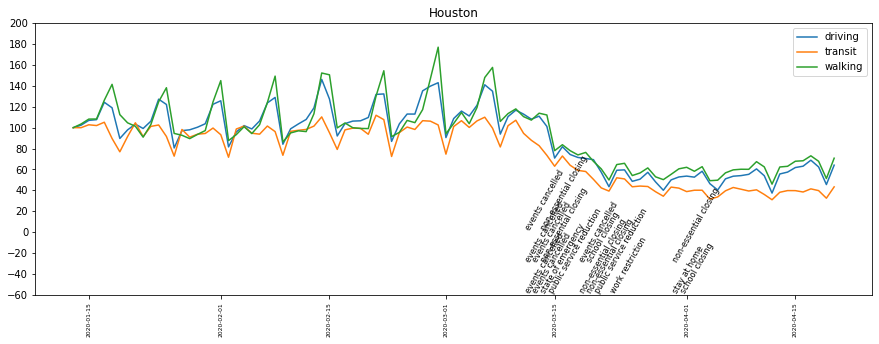

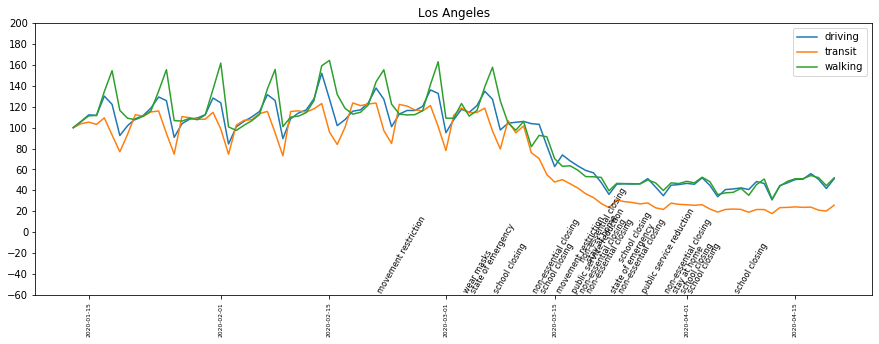

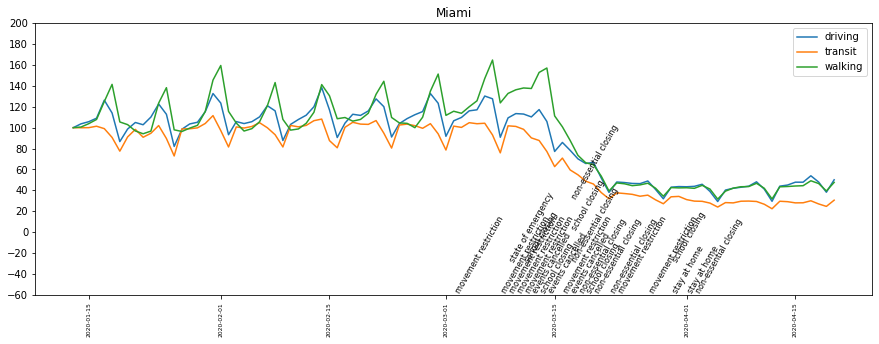

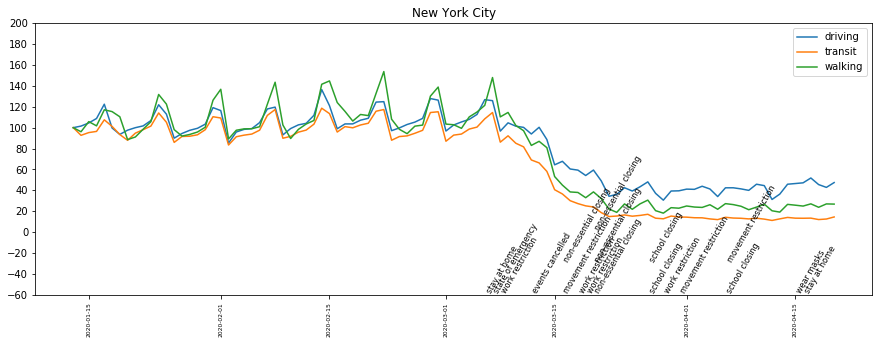

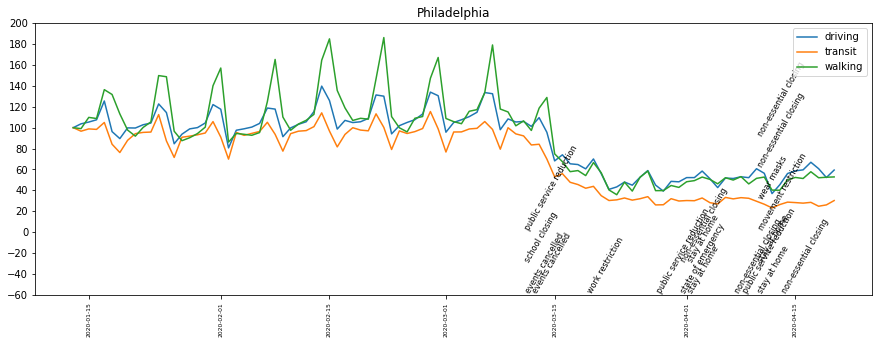

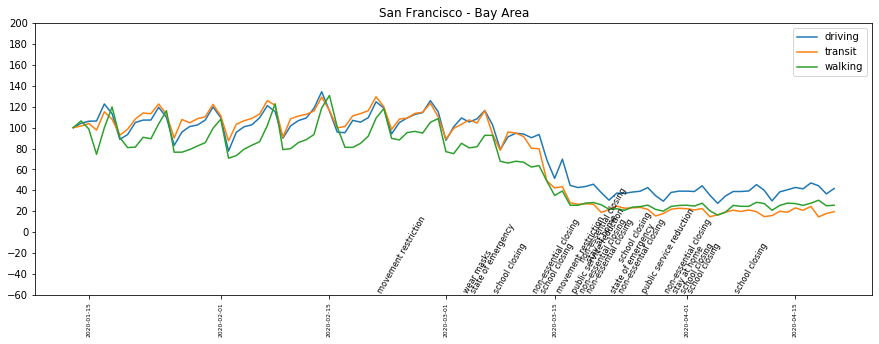

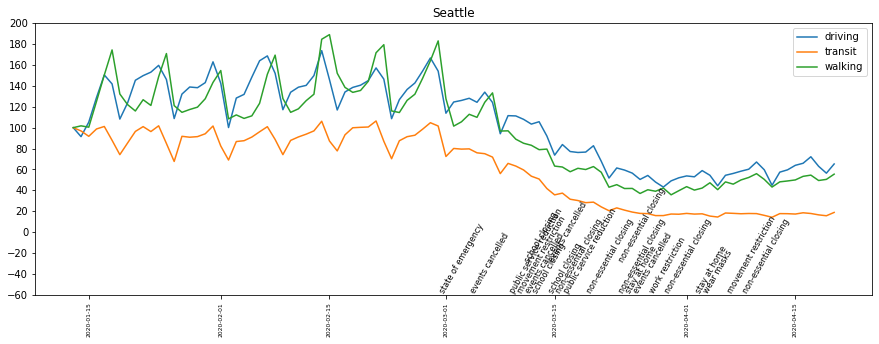

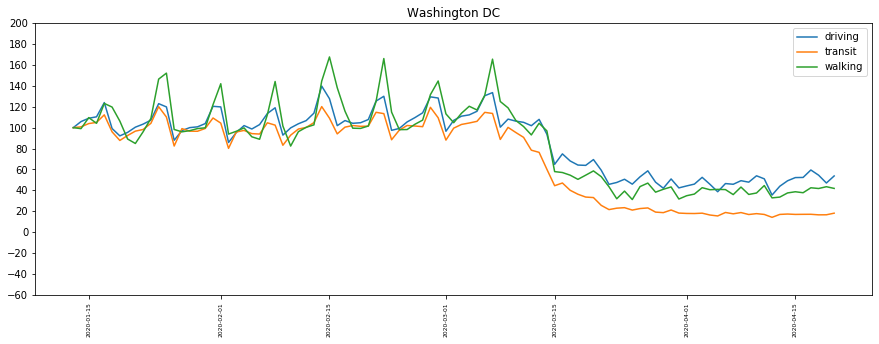

In [9]:
start = 4
for i in range(0,len(apple),3):
    current = apple.iloc[i:i+3,:]
    state = current.iloc[0]["state"]
    region = current.iloc[0]["region"]
    dates = pd.to_datetime(current.columns[start:])
    mobility = []
    mob_labels = []
    for j in range(3):
        mob_labels.append(current.iloc[j]["transportation_type"])
        mobility.append(Series(index=dates, data=current.iloc[j,start:]))
    state_data = mitig[(mitig["State"]) == state]
    refined = state_data[state_data["Mitigation type"] != "other"] # don't include other tag
    refined = refined[refined["Mitigation type"] != "new public services"]
    refined = refined[refined["County"].isna()] # only look at state wide
    mitig_types = refined["Mitigation type"].values
    mitig_dates = pd.to_datetime(refined["Date"].values)
    plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, region=region,rotation=60, text_height=-58)

In [1]:
# current = apple[apple["state"] == "Florida"]
# state = current.iloc[0]["state"]
# region = current.iloc[0]["region"]
# dates = pd.to_datetime(current.columns[4:])
# mobility = []
# mob_labels = []
# for j in range(3):
#     mob_labels.append(current.iloc[j]["transportation_type"])
#     mobility.append(Series(index=dates, data=current.iloc[j,4:]))
# state_data = mitig[(mitig["State"]) == state]
# print(state_data)
# refined = state_data[state_data["Mitigation type"] != "other"] # don't include other tag
# refined = refined[refined["Mitigation type"] != "new public services"]
# refined = refined[refined["County"].isna()] # only look at state wide
# mitig_types = refined["Mitigation type"].values
# print(mitig_types)
# mitig_dates = pd.to_datetime(refined["Date"].values)
# plot_mitig_mob(mobility, mob_labels, mitig_dates, mitig_types, state, region=region,rotation=75, text_height=30)

In [4]:
google_US = pd.read_csv("google_US_and_states_cleaned.csv")

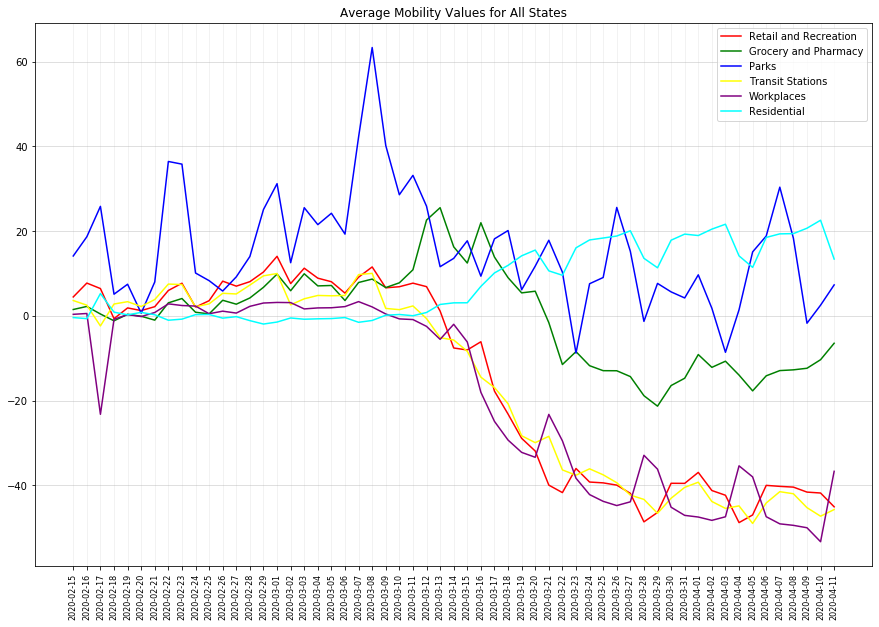

In [5]:
# group the google mobility data by dates and average the attributes for all states
goog_averages = google_US.groupby(by=["date"]).mean()
goog_averages.drop(axis=1, labels=["Unnamed: 0", "sub_region_2"], inplace=True)

colors = ["red", "green", "blue", "yellow", "purple", "cyan"]
labels = ["Retail and Recreation", "Grocery and Pharmacy", "Parks", "Transit Stations", "Workplaces", "Residential"]

# plot each mobility attribute
fig = plt.figure(figsize=(15,10))
ax = fig.gca()
for i in range(len(goog_averages.columns)):
    ax.plot(goog_averages.index, goog_averages.iloc[:,i], c=colors[i], label=labels[i])
plt.xticks(rotation=90, fontsize=8)
plt.legend()
plt.title("Average Mobility Values for All States")
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.2)
plt.show()

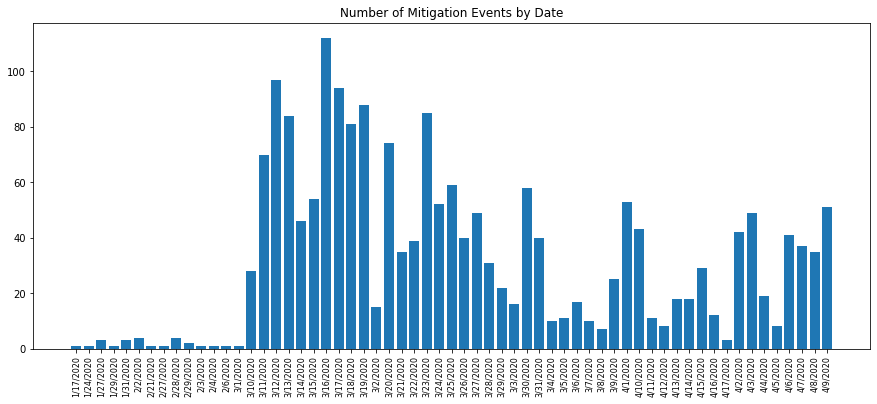

In [6]:
# only consider the Statewide and countrywide mitigation events
counts = mitig[mitig["County"].isna()]["Date"].value_counts()
counts.sort_index(inplace=True)

plt.figure(figsize=(15,6))
plt.bar(counts.index, counts.values)
plt.xticks(rotation=90, fontsize=8)
plt.title("Number of Mitigation Events by Date")
plt.show();

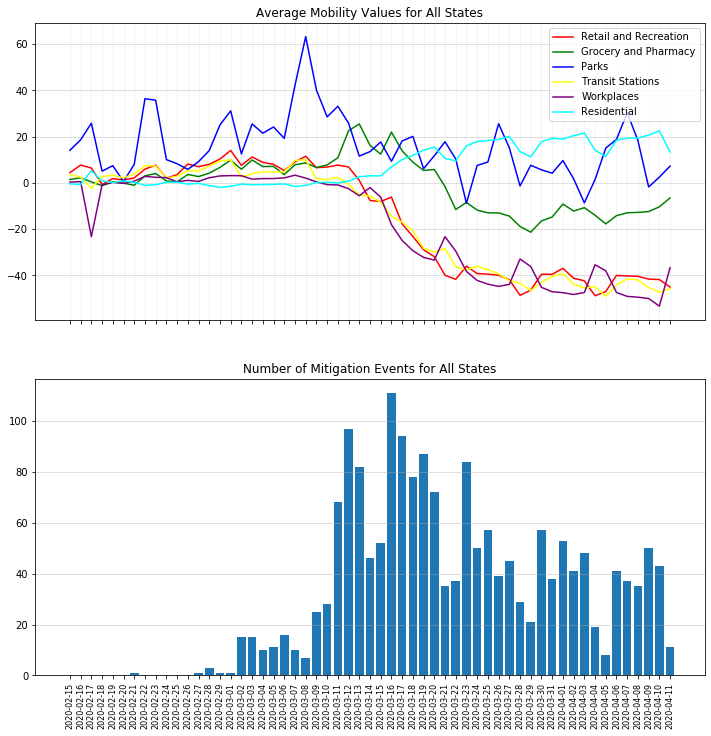

In [8]:
# only consider the Statewide mitigation events
counts = mitig.loc[(mitig["State"] != "USA") & (mitig["County"].isna())]["Date"].value_counts()
counts.sort_index(inplace=True)
counts = Series(data=counts.values, index=pd.to_datetime(counts.index))

# Create a series with a common date index and the mitigation value counts
date_axis = pd.to_datetime(goog_averages.index)
counts.reindex(date_axis, fill_value=0)
mitig_counts = counts.reindex(date_axis, fill_value=0)

# set up subplots
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)
fig.set_size_inches(12,12)

# add google data to top subplot
for i in range(len(goog_averages.columns)):
    axes[0].plot(mitig_counts.index, goog_averages.iloc[:,i], c=colors[i], label=labels[i])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.5)
axes[0].grid(axis='x', alpha=0.2)
axes[0].set_title("Average Mobility Values for All States")

# add mitigation data to bottom subplot
axes[1].bar(mitig_counts.index, mitig_counts.values)
axes[1].grid(axis='y', alpha = 0.5)
axes[1].set_title("Number of Mitigation Events for All States")
axes[1].set_xticks(date_axis)
plt.xticks(rotation=90, fontsize=8)
# plt.savefig("average_mobility_and_mitigation_events", bbox_inches='tight')
plt.show();